#LOAD LIBRARIES

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec


LOAD DATA

In [4]:
df = pd.read_csv("data1.csv",delimiter=';')
df.head()

,account length,location code,user id,credit card info save,push status,add to wishlist,desktop sessions,app sessions,desktop transactions,total product detail views,session duration,promotion clicks,avg order value,sale product views,discount rate per visited products,product detail view per app session,app transactions,add to cart per session,customer service calls,churn
0,128,415,3824657,no,yes,25,265,45,17,110,197,87,"244,7",91,"11,01",10,3,"2,7",1,0
1,107,415,3717191,no,yes,26,162,27,17,123,196,103,"254,4",103,"11,45","13,7",3,"3,7",1,0
2,137,415,3581921,no,no,0,243,41,10,114,121,110,"162,6",104,"7,32","12,2",5,"3,29",0,0
3,84,408,3759999,yes,no,0,299,51,5,71,62,88,"196,9",89,"8,86","6,6",7,"1,78",2,0
4,75,415,3306626,yes,no,0,167,28,13,113,148,122,"186,9",121,"8,41","10,1",3,"2,73",3,0


In [6]:
df.columns.value_counts().sum()

20

In [95]:
df.shape

(3333, 20)

In [25]:
df.columns.value_counts

<bound method IndexOpsMixin.value_counts of Index(['account_length', 'location_code', 'user_id', 'credit_card_info_save',
       'push_status', 'add_to_wishlist', 'desktop_sessions', 'app_sessions',
       'desktop_transactions', 'total_product_detail_views',
       'session_duration', 'promotion_clicks', 'avg_order_value',
       'sale_product_views', 'discount_rate_per_visited_products',
       'product_detail_view_per_app_session', 'app_transactions',
       'add_to_cart_per_session', 'customer_service_calls', 'churn'],
      dtype='object')>

EDA
With every new dataset we need to get through an EDA (Exploratory Data Analysis) process. It's a good idea to have a basic framework in mind for our EDAs.It's always a good idea to:

Understand what our columns say
Rename columns labels and make them lowercase
Make sure that the data types of columns are correct
Handle missing values
Check for duplicates
Search for outliers
Check for linearity between variables
To achieve this we can take advantage of Pandas and visualisation libraries

In [3]:
# Check column names
df.columns

Index(['account length', 'location code', 'user id', 'credit card info save',
       'push status', 'add to wishlist', 'desktop sessions', 'app sessions',
       'desktop transactions', 'total product detail views',
       'session duration', 'promotion clicks', 'avg order value',
       'sale product views', 'discount rate per visited products',
       'product detail view per app session', 'app transactions',
       'add to cart per session', 'customer service calls', 'churn'],
      dtype='object')

In [4]:
df.columns = df.columns.str.replace(' ','_')
df.columns


Index(['account_length', 'location_code', 'user_id', 'credit_card_info_save',
       'push_status', 'add_to_wishlist', 'desktop_sessions', 'app_sessions',
       'desktop_transactions', 'total_product_detail_views',
       'session_duration', 'promotion_clicks', 'avg_order_value',
       'sale_product_views', 'discount_rate_per_visited_products',
       'product_detail_view_per_app_session', 'app_transactions',
       'add_to_cart_per_session', 'customer_service_calls', 'churn'],
      dtype='object')

In [5]:
# check the column types and some basic information of the data with the .info() function
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   account_length                       3333 non-null   int64 
 1   location_code                        3333 non-null   int64 
 2   user_id                              3333 non-null   int64 
 3   credit_card_info_save                3333 non-null   object
 4   push_status                          3333 non-null   object
 5   add_to_wishlist                      3333 non-null   int64 
 6   desktop_sessions                     3333 non-null   int64 
 7   app_sessions                         3333 non-null   int64 
 8   desktop_transactions                 3333 non-null   int64 
 9   total_product_detail_views           3333 non-null   int64 
 10  session_duration                     3333 non-null   int64 
 11  promotion_clicks                     3333 n

In [6]:
# change the data-type of the 4 columns to float
df['avg_order_value'] = df['avg_order_value'].replace(',','.', regex=True).astype(float)
df['discount_rate_per_visited_products'] = df['discount_rate_per_visited_products'].replace(',','.', regex=True).astype(float)
df['add_to_cart_per_session'] = df['add_to_cart_per_session'].replace(',','.', regex=True).astype(float)
df['product_detail_view_per_app_session'] = df['product_detail_view_per_app_session'].replace(',','.', regex=True).astype(float)

df.dtypes

account_length                           int64
location_code                            int64
user_id                                  int64
credit_card_info_save                   object
push_status                             object
add_to_wishlist                          int64
desktop_sessions                         int64
app_sessions                             int64
desktop_transactions                     int64
total_product_detail_views               int64
session_duration                         int64
promotion_clicks                         int64
avg_order_value                        float64
sale_product_views                       int64
discount_rate_per_visited_products     float64
product_detail_view_per_app_session    float64
app_transactions                         int64
add_to_cart_per_session                float64
customer_service_calls                   int64
churn                                    int64
dtype: object

STASTICAL ANALYSIS


There are no missing values in our data (see .info() results) so we can move on and check our descriptive statistics with the .describe() function.

In [7]:
df.describe()


,account_length,location_code,user_id,add_to_wishlist,desktop_sessions,app_sessions,desktop_transactions,total_product_detail_views,session_duration,promotion_clicks,avg_order_value,sale_product_views,discount_rate_per_visited_products,product_detail_view_per_app_session,app_transactions,add_to_cart_per_session,customer_service_calls,churn
count,3333.000000,3333.000000,3.333000e+03,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,3.746291e+06,8.099010,179.811881,30.567957,17.087609,100.435644,201.039604,100.110711,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,39.822106,42.371290,2.746626e+05,13.688365,54.457135,9.269376,4.323795,20.069084,50.714359,19.923911,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,1.000000,408.000000,3.271058e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,3.508680e+06,0.000000,144.000000,24.000000,14.000000,87.000000,167.000000,87.000000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,101.000000,415.000000,3.748187e+06,0.000000,179.000000,31.000000,17.000000,101.000000,201.000000,100.000000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,510.000000,3.985970e+06,20.000000,216.000000,37.000000,20.000000,114.000000,235.000000,114.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,510.000000,4.229964e+06,51.000000,351.000000,60.000000,31.000000,165.000000,364.000000,170.000000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


In [8]:
# descriptive statistics for non-numeric columns (after the conversion)
df.describe(exclude= np.number)

,credit_card_info_save,push_status
count,3333,3333
unique,2,2
top,no,no
freq,3010,2411


Handle Missing Values
Missing values can be an issue with most real-life datasets. The Kaggle data is usually of better quality and as we saw when we used the .info() function, there are no missing values. For the sake of double checking and to show a way of checking whether the dataset has missing values, let's write some code below

In [9]:
# Check missing values and sort data by descending order
df.isnull().sum().sort_values(ascending=False)

account_length                         0
location_code                          0
customer_service_calls                 0
add_to_cart_per_session                0
app_transactions                       0
product_detail_view_per_app_session    0
discount_rate_per_visited_products     0
sale_product_views                     0
avg_order_value                        0
promotion_clicks                       0
session_duration                       0
total_product_detail_views             0
desktop_transactions                   0
app_sessions                           0
desktop_sessions                       0
add_to_wishlist                        0
push_status                            0
credit_card_info_save                  0
user_id                                0
churn                                  0
dtype: int64

<Axes: >

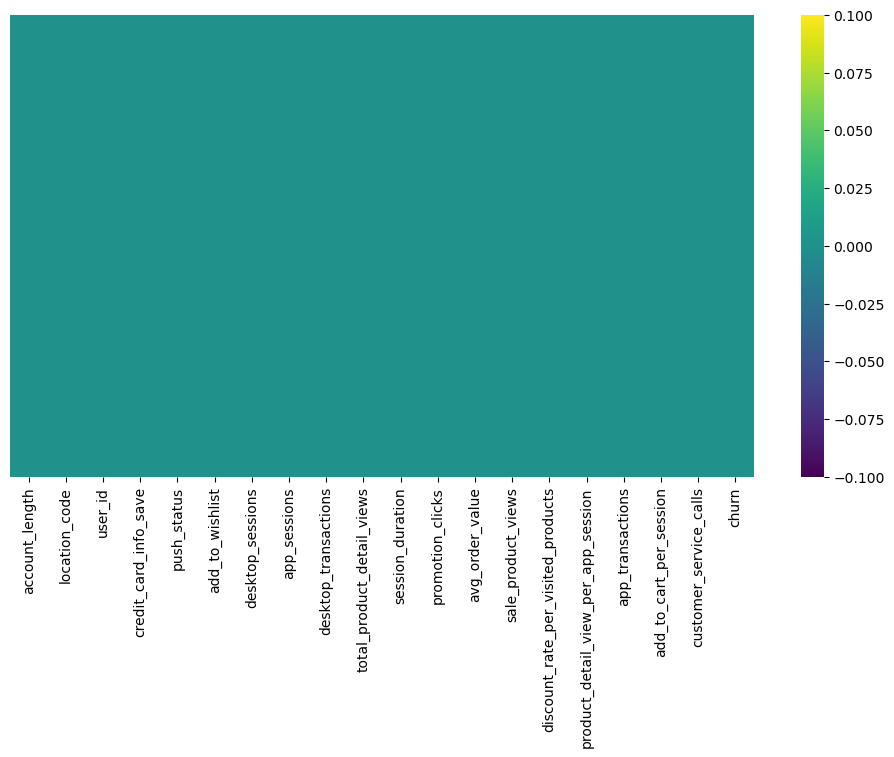

In [13]:

plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), yticklabels= False, cbar= True, cmap='viridis')

Check for duplicates
Another common issue with data is duplicated records. We need to make sure to always check for duplicates

In [15]:
# Let's start by checking whether all user ids are unique
## If we find duplicated user ids we'll have to understand if there is a reason for appearing more than once in the data
df.user_id.nunique()

3333

Search for outliers
Outliers are data points at the extreme points of a dataset.
Some outliers represent true values from natural variation in the population and some occur because of dirty or incorect data.
Because of this, we need to be careful when we cleanse our data
If the outliers are True outliers, we should probably keep them in our data since they represent natural variations in our sample
If the outliers are errors we should generally remove those data points
We've already identified some potential outliers from our .describe() function with session durations, average order value, promotion clicks, sale product views, app transactions, account length, add to wish list, desktop sessions, and customer service calls.

To identify our outliers we can use:

Visualisations such as histograms and blox plots
Use interquartiles with the rules below:



outlier < Q1 - 1.5(IQR)
outlier > Q3 + 1.5(IQR)

HERE,
Q1 = L1 + ((N/4) - cf ).(L2-L1)/4
Q3 = L1 + ((3N/4) - cf ).(L2-L1)/4
AND 
IQR = Q3-Q1


BASIC CONCEPTS:
Q1 (First Quartile): The median of the lower half of the data (25th percentile)
Q3 (Third Quartile): The median of the upper half of the data (75th percentile)
IQR (Interquartile Range): The difference between Q3 and Q1 (IQR = Q3 - Q1)


Why They're Used for Outlier Detection:
1) Robust to Extreme Values
  Unlike mean and standard deviation, quartiles are not heavily influenced by extreme values
  This makes them more reliable for identifying true outliers

2)The 1.5 IQR Rule:
  Values are considered outliers if they are:
  Below Q1 - 1.5 × IQR (lower fence)
  Above Q3 + 1.5 × IQR (upper fence)

3)Statistical Foundation:
  *For normally distributed data:
     ~99.3% of data falls within these bounds
     Makes it good for identifying genuine anomalies
  *Works well even for non-normal distributions

4)Advantages:
   *Simple to calculate and interpret
   *Non-parametric (doesn't assume normal distribution)
   *Less sensitive to extreme values than z-score method
   *Provides clear boundaries for outlier classification


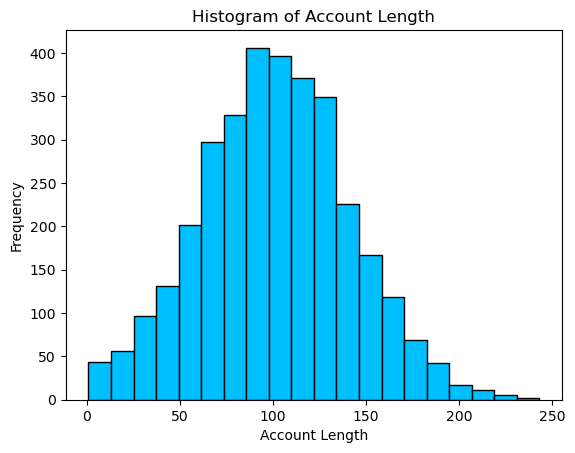

In [19]:
plt.hist(df['account_length'], bins=20, color='deepskyblue', edgecolor='black')

# Add titles and labels
plt.title('Histogram of Account Length')
plt.xlabel('Account Length')
plt.ylabel('Frequency')

# Show the plot
plt.show()
## Data is distributed normally, with some extreme outliers above 200

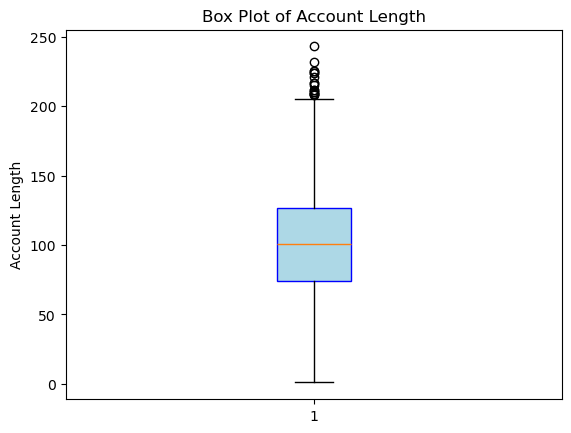

In [21]:
# Create the box plot
plt.boxplot(df['account_length'], vert=True, patch_artist=True, boxprops=dict(facecolor='lightblue', color='blue'))

# Add labels and title
plt.ylabel('Account Length')
plt.title('Box Plot of Account Length')

# Show the plot
plt.show()
## The box plot makes it a bit clearer, here we can argue that everything above 200 length is an outlier

This is an EDA so we are going to visualize all the variables we identified as having potentail outliers

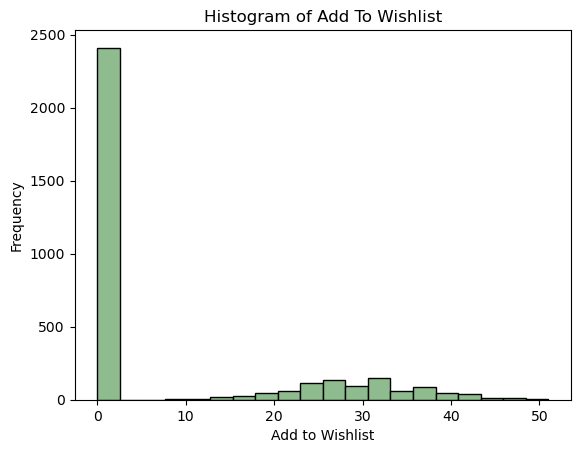

In [39]:
plt.hist(df['add_to_wishlist'], bins=20, color='darkseagreen', edgecolor='black')

# Add titles and labels
plt.title('Histogram of Add To Wishlist')
plt.xlabel('Add to Wishlist')
plt.ylabel('Frequency')

# Show the plot
plt.show()
## Majority are 0, should that be dealt with as an outlier? The data is generated automatically so this is a real representation of our sample

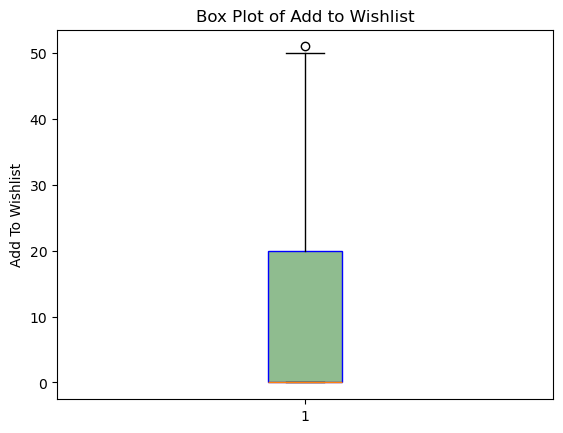

In [40]:
# Create the box plot
plt.boxplot(df['add_to_wishlist'], vert=True, patch_artist=True, boxprops=dict(facecolor='darkseagreen', color='blue'))

# Add labels and title
plt.ylabel('Add To Wishlist')
plt.title('Box Plot of Add to Wishlist')

# Show the plot
plt.show()
## From the box plot we can see that 51 is the largest outlier
## Since there are so many observations with 0s, 0 is not considered an outlier

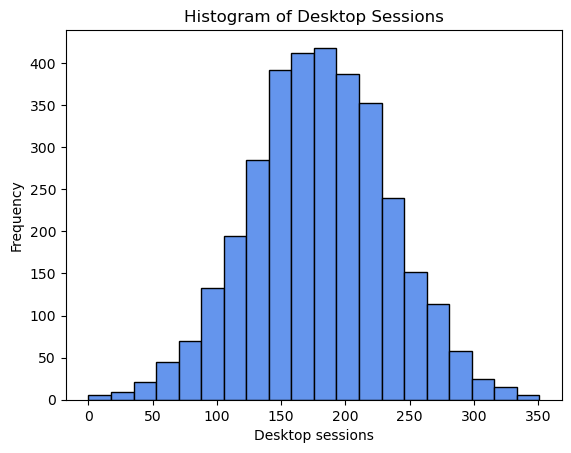

In [41]:
plt.hist(df['desktop_sessions'], bins=20, color='cornflowerblue', edgecolor='black')

# Add titles and labels
plt.title('Histogram of Desktop Sessions')
plt.xlabel('Desktop sessions')
plt.ylabel('Frequency')

# Show the plot
plt.show() 
## We see the outliers we identified for values over 300, but sessions below 30 could be as well

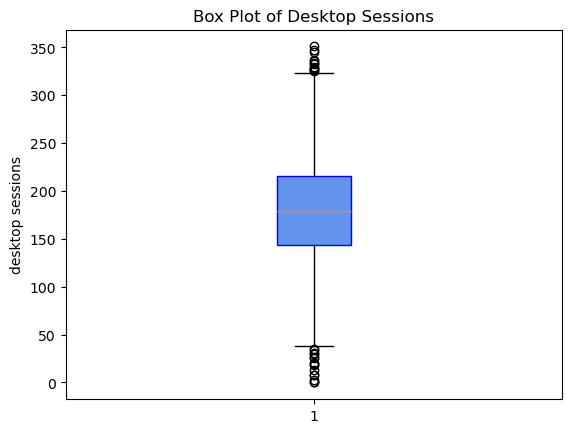

In [42]:
# Create the box plot
plt.boxplot(df['desktop_sessions'], vert=True, patch_artist=True, boxprops=dict(facecolor='cornflowerblue', color='blue'))

# Add labels and title
plt.ylabel('desktop sessions')
plt.title('Box Plot of Desktop Sessions')

# Show the plot
plt.show()
## The box plot suggests that anything above 325, and anything below 35 is an outlier. Again these are real representations of the population

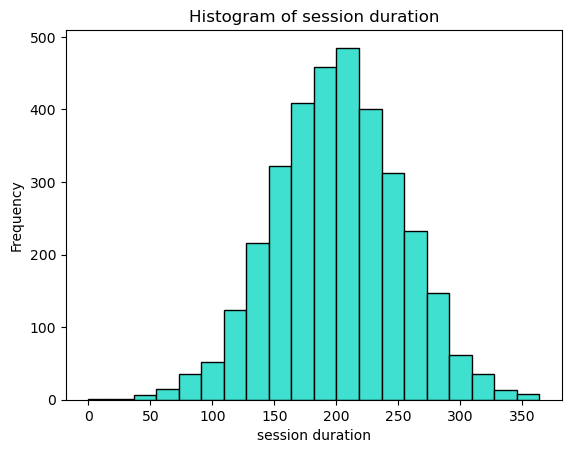

In [43]:
plt.hist(df['session_duration'], bins=20, color='turquoise', edgecolor='black')

# Add titles and labels
plt.title('Histogram of session duration')
plt.xlabel('session duration')
plt.ylabel('Frequency')

# Show the plot
plt.show() 


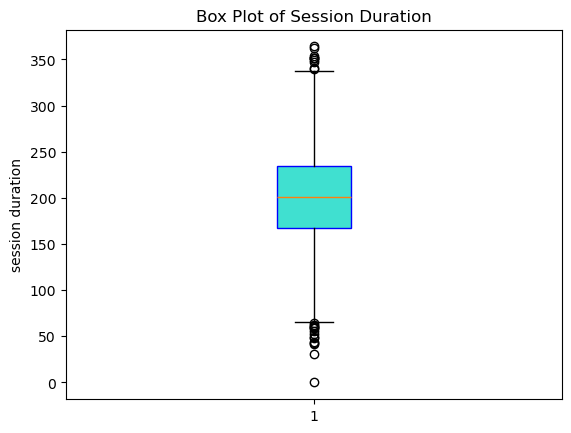

In [44]:
# Create the box plot
plt.boxplot(df['session_duration'], vert=True, patch_artist=True, boxprops=dict(facecolor='turquoise', color='blue'))

# Add labels and title
plt.ylabel('session duration')
plt.title('Box Plot of Session Duration')

# Show the plot
plt.show()
## Anything above 340 and anything below 65 seems to be an outlier. 
## I don't think that if a session is below 1 minute is an outlier in reality

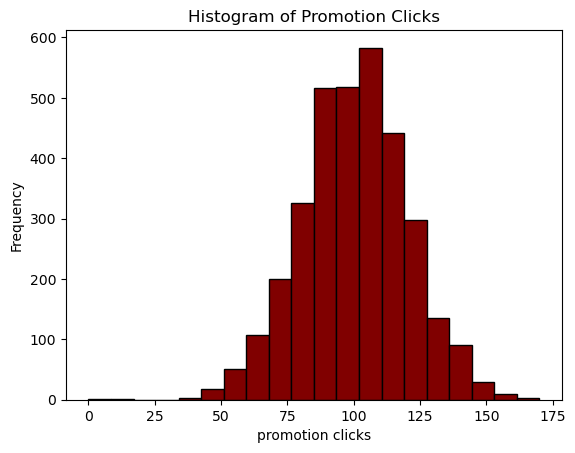

In [45]:
plt.hist(df['promotion_clicks'], bins=20, color='maroon', edgecolor='black')

# Add titles and labels
plt.title('Histogram of Promotion Clicks')
plt.xlabel('promotion clicks')
plt.ylabel('Frequency')

# Show the plot
plt.show() 

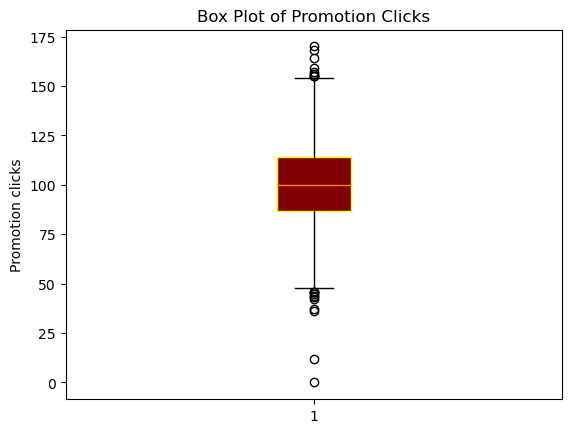

In [47]:
# Create the box plot
plt.boxplot(df['promotion_clicks'], vert=True, patch_artist=True, boxprops=dict(facecolor='maroon', color='yellow'))

# Add labels and title
plt.ylabel('Promotion clicks')
plt.title('Box Plot of Promotion Clicks')

# Show the plot
plt.show()
## The box plot indicates that anything above 155 and any data point below 45 is an outlier

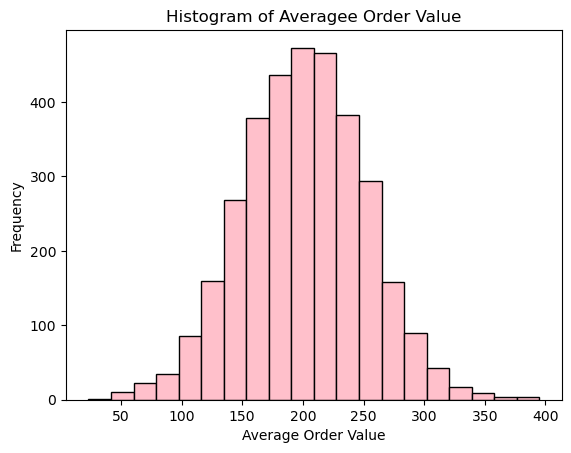

In [52]:
plt.hist(df['avg_order_value'], bins=20, color='pink', edgecolor='black')

# Add titles and labels
plt.title('Histogram of Averagee Order Value')
plt.xlabel('Average Order Value')
plt.ylabel('Frequency')

# Show the plot
plt.show() 

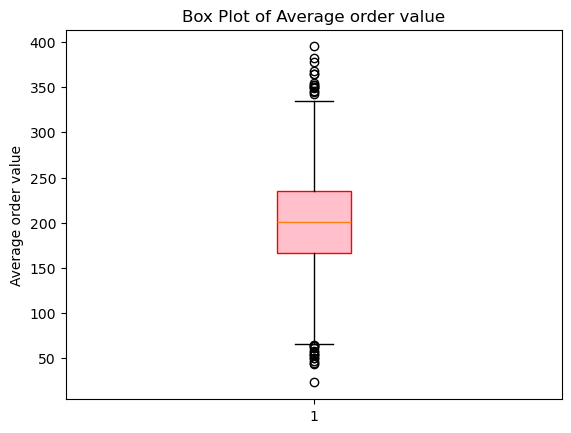

In [54]:
# Create the box plot
plt.boxplot(df['avg_order_value'], vert=True, patch_artist=True, boxprops=dict(facecolor='pink', color='red'))

# Add labels and title
plt.ylabel('Average order value')
plt.title('Box Plot of Average order value')

# Show the plot
plt.show()
## The box plot indicates that anything above 342.8 and below 64.2 could be consider an outlier

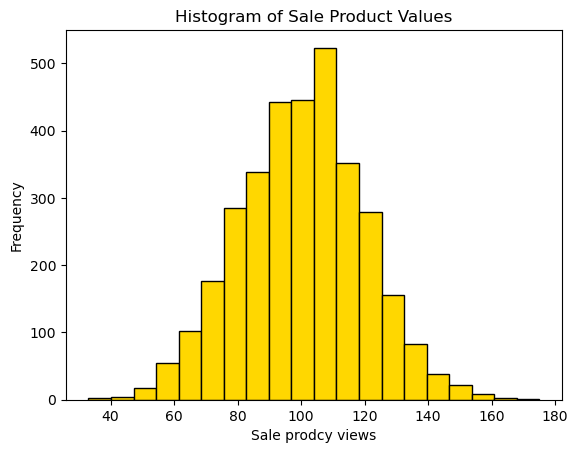

In [57]:
plt.hist(df['sale_product_views'], bins=20, color='gold', edgecolor='black')

# Add titles and labels
plt.title('Histogram of Sale Product Values')
plt.xlabel('Sale prodcy views')
plt.ylabel('Frequency')

# Show the plot
plt.show() 

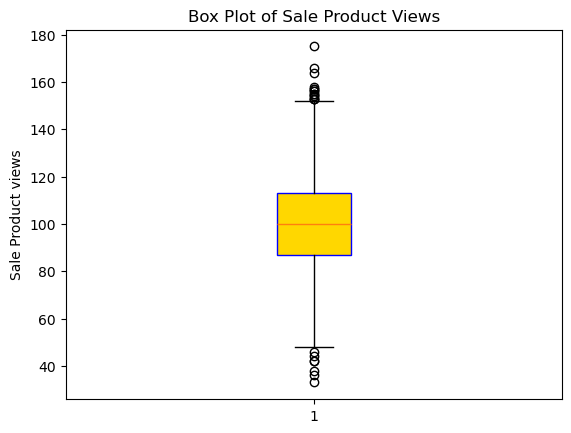

In [58]:
# Create the box plot
plt.boxplot(df['sale_product_views'], vert=True, patch_artist=True, boxprops=dict(facecolor='gold', color='blue'))

# Add labels and title
plt.ylabel('Sale Product views')
plt.title('Box Plot of Sale Product Views')

# Show the plot
plt.show()
## The box plot indicates that more than 153 and below 46 sale product views can be consider to be outliers

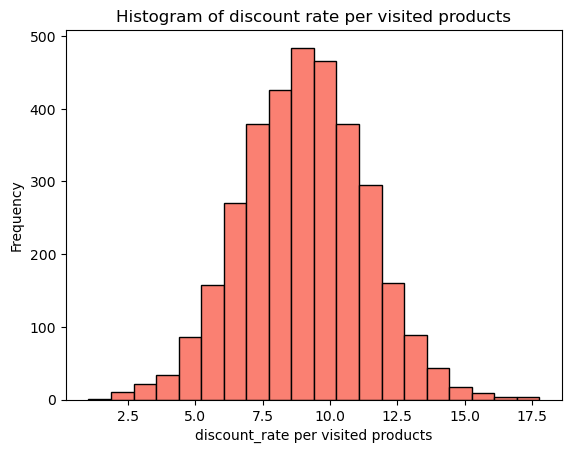

In [60]:
plt.hist(df['discount_rate_per_visited_products'], bins=20, color='salmon', edgecolor='black')

# Add titles and labels
plt.title('Histogram of discount rate per visited products')
plt.xlabel('discount_rate per visited products')
plt.ylabel('Frequency')

# Show the plot
plt.show() 

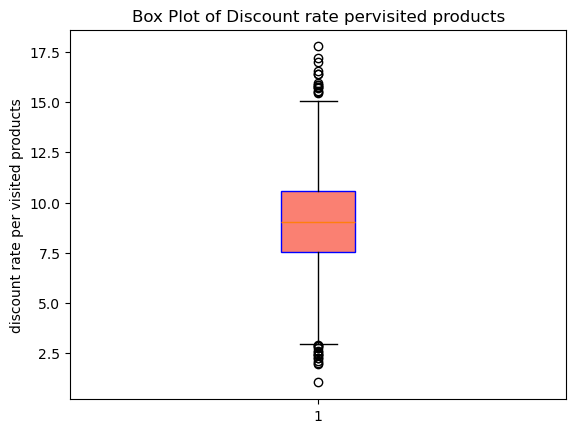

In [61]:
plt.boxplot(df['discount_rate_per_visited_products'], vert=True, patch_artist=True, boxprops=dict(facecolor='salmon', color='blue'))

# Add labels and title
plt.ylabel('discount rate per visited products')
plt.title('Box Plot of Discount rate pervisited products')

# Show the plot
plt.show()
# Discounts above 15% and below 2.89% could be considered to be outliers

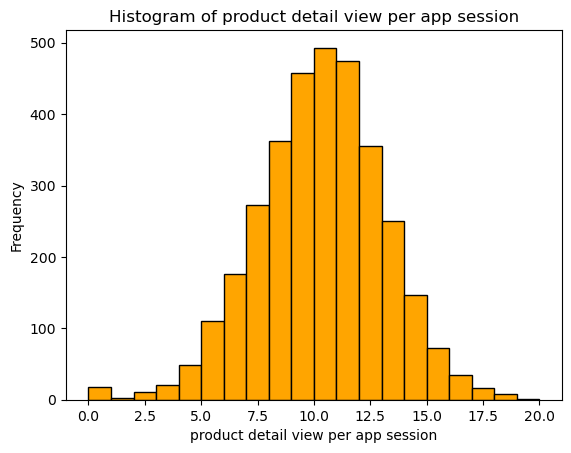

In [63]:
plt.hist(df['product_detail_view_per_app_session'], bins=20, color='orange', edgecolor='black')

# Add titles and labels
plt.title('Histogram of product detail view per app session')
plt.xlabel('product detail view per app session')
plt.ylabel('Frequency')

# Show the plot
plt.show() 

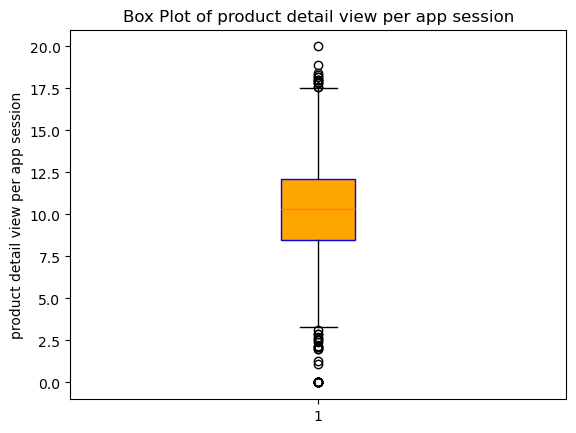

In [64]:
plt.boxplot(df['product_detail_view_per_app_session'], vert=True, patch_artist=True, boxprops=dict(facecolor='orange', color='blue'))

# Add labels and title
plt.ylabel('product detail view per app session')
plt.title('Box Plot of product detail view per app session')

# Show the plot
plt.show()
## The box plot suggests that above 17.5 and below 2.9 sessions could be considered outliers

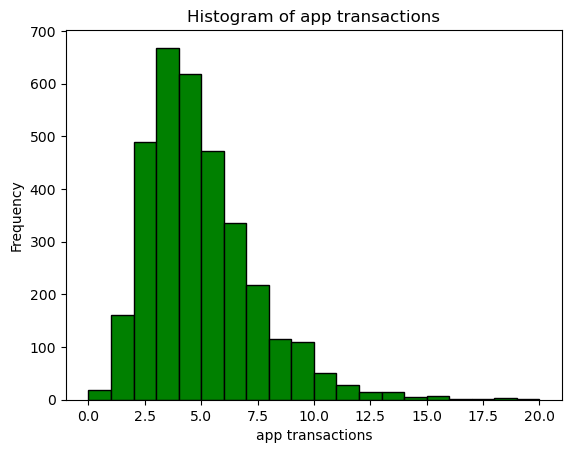

In [65]:
plt.hist(df['app_transactions'], bins=20, color='green', edgecolor='black')

# Add titles and labels
plt.title('Histogram of app transactions')
plt.xlabel('app transactions')
plt.ylabel('Frequency')

# Show the plot
plt.show() 
# app transactions are skewed towards 0 but with a somewhat normal distribution
## looks like above 9 transactions could be consider an outlier

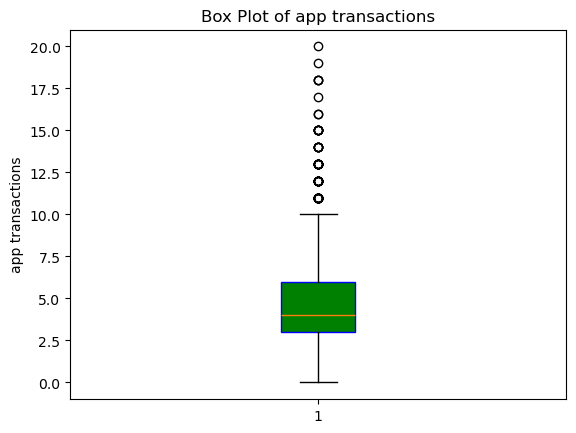

In [66]:
plt.boxplot(df['app_transactions'], vert=True, patch_artist=True, boxprops=dict(facecolor='green', color='blue'))

# Add labels and title
plt.ylabel('app transactions')
plt.title('Box Plot of app transactions')

# Show the plot
plt.show()
## per box plot anything from 10 and above could be considered an outlier

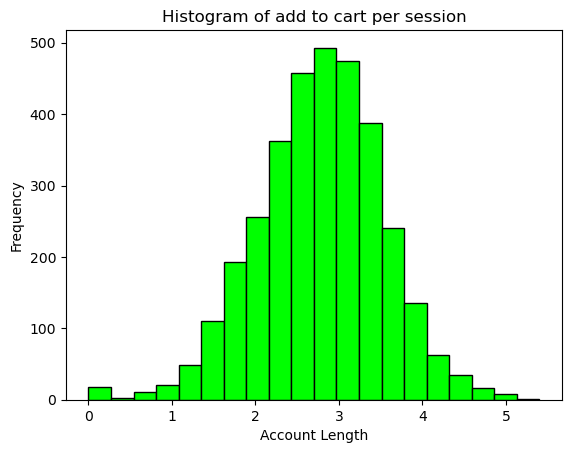

In [67]:
plt.hist(df['add_to_cart_per_session'], bins=20, color='lime', edgecolor='black')

# Add titles and labels
plt.title('Histogram of add to cart per session')
plt.xlabel('Account Length')
plt.ylabel('Frequency')

# Show the plot
plt.show() 
#data follows a normal distribution 

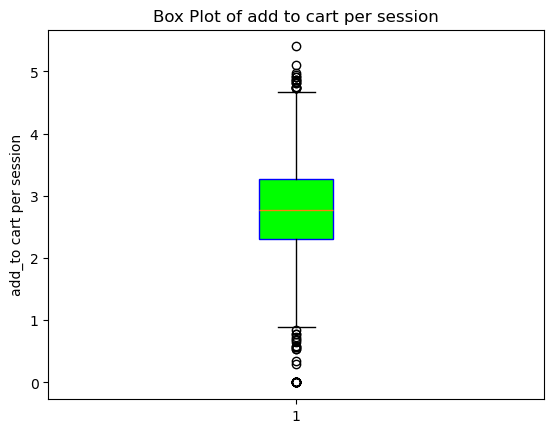

In [68]:
plt.boxplot(df['add_to_cart_per_session'], vert=True, patch_artist=True, boxprops=dict(facecolor='lime', color='blue'))

# Add labels and title
plt.ylabel('add_to cart per session')
plt.title('Box Plot of add to cart per session')

# Show the plot
plt.show()
## The box plot suggests that anything above 4.73 and below 0.84 could be considered an outlier

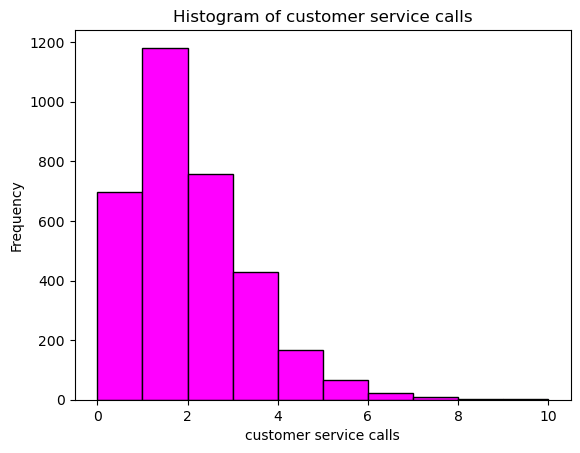

In [72]:
bins = range(df["customer_service_calls"].min(), df["customer_service_calls"].max() + 2)
plt.hist(df['customer_service_calls'], bins=bins, color='magenta', edgecolor='black')

# Add titles and labels
plt.title('Histogram of customer service calls')
plt.xlabel('customer service calls')
plt.ylabel('Frequency')

# Show the plot
plt.show() 

## as we expected, data is skewed towards 0 with anythhing above 5 being a potential outlier

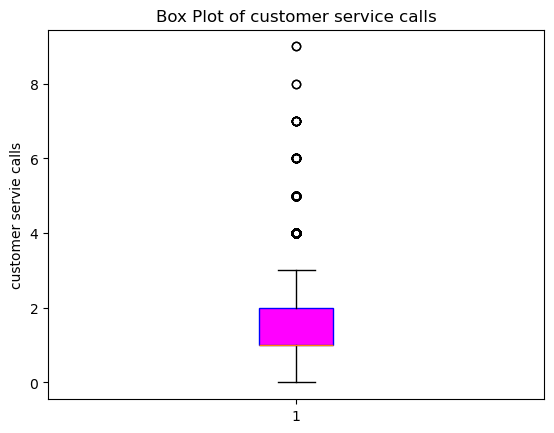

In [73]:
plt.boxplot(df['customer_service_calls'], vert=True, patch_artist=True, boxprops=dict(facecolor='magenta', color='blue'))

# Add labels and title
plt.ylabel('customer servie calls')
plt.title('Box Plot of customer service calls')

# Show the plot
plt.show()
## box plot suggests anything above 4 could be considered an oulier

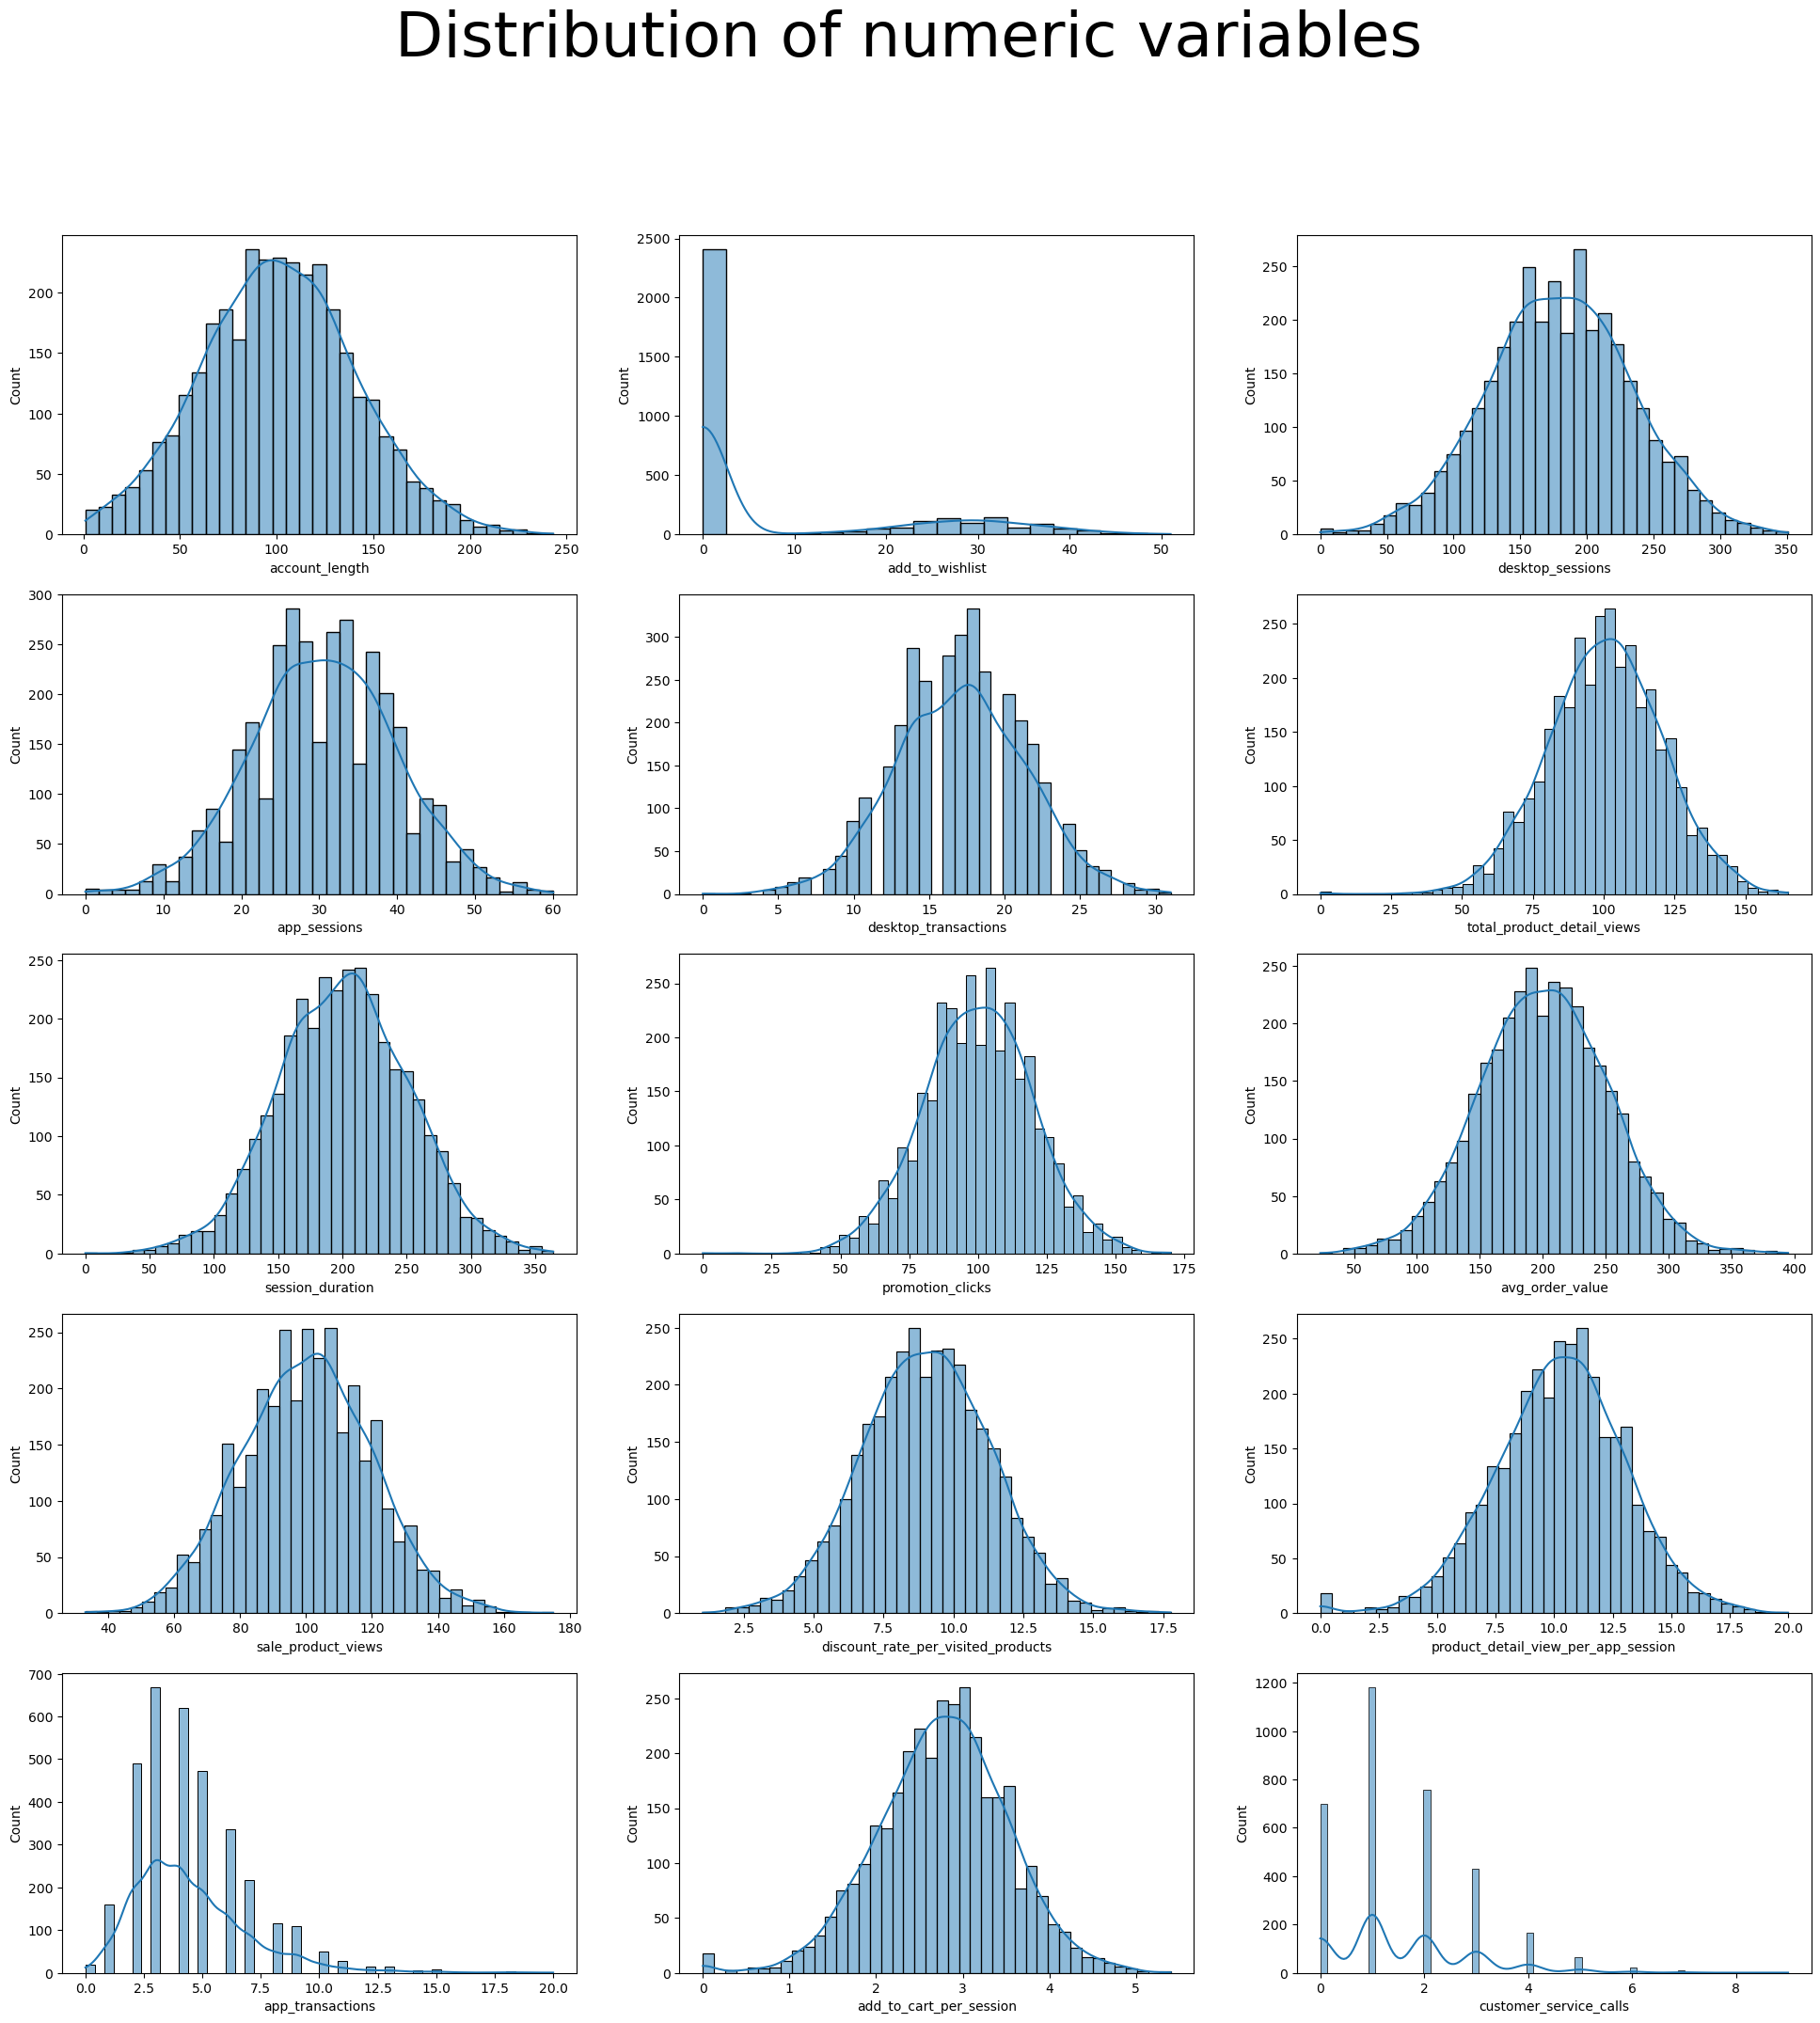

In [74]:
# An alternative way to plot the distribution of all numeric variables in one go is the below

## Create a list of the numeric variables
numeric_columns = ['account_length', 'add_to_wishlist', 'desktop_sessions','app_sessions', 'desktop_transactions',
                   'total_product_detail_views','session_duration', 'promotion_clicks', 'avg_order_value','sale_product_views',
                   'discount_rate_per_visited_products','product_detail_view_per_app_session', 'app_transactions',
                   'add_to_cart_per_session', 'customer_service_calls']

fig, axes = plt.subplots(5,3, figsize=(24,24))
fig.suptitle("Distribution of numeric variables", size=48)

for i in range(5):
    for j in range(3):
        sns.histplot(df[numeric_columns[3*i+j]], ax=axes[i,j], kde=True)

Conclusions based on our visualisations
  *All of the numerical variables in the dataset has outliers from a statistical point of view. What is apparent is that all of the outliers represent natural variations as in e-commerce we expect such variations, making the outliers "True outliers".
  *If we had Outliers that we believe them to be data errors we could always use techniques such as removing all data points that are < Q1 - 1.5(IQR) and > Q3 +1.5(IQR) or removing data points that are 3 standard deviations below or above mean (example code below if you need to use it)

In [75]:
# Example code for removing outliers based on 3 standard deviations below and above mean

## Create an example dataframe by copying our dataframe
ex_df = df.copy()

## Create a list with the numeric columns
numeric_columns = ['account_length', 'add_to_wishlist', 'desktop_sessions','app_sessions', 'desktop_transactions',
                   'total_product_detail_views','session_duration', 'promotion_clicks', 'avg_order_value','sale_product_views',
                   'discount_rate_per_visited_products','product_detail_view_per_app_session', 'app_transactions',
                   'add_to_cart_per_session', 'customer_service_calls']

## Create the outliers list for each numeric column
outliers = []
for i in numeric_columns:
    outliers.extend(ex_df[(ex_df[i] < ex_df[i].mean() - 3*ex_df[i].std()) | (ex_df[i] > ex_df[i].mean() + 3*ex_df[i].std())].index)
    
## drop the outliers from the example dataframe    
ex_df.drop(set(outliers),inplace = True)

In [77]:
# compare the example dataframe and the dataframe that includes the true outliers
print(F"The number of observations with the True outliers is {len(df.index)} and the number of observations without the True outliers is {len(ex_df.index)}. \nThis is {len(df.index) - len(ex_df.index)} rows difference.")

The number of observations with the True outliers is 3333 and the number of observations without the True outliers is 3168. 
This is 165 rows difference.


Analysis of the Dependent variable (Churn) vs Idependent variables


Until now we've looked into the numeric variables, their missing data, duplicates, distribution, and outliers. A key part of the customer behaviour data is to understand which "behaviours" aka idependent varialbes in our dataset can help us predict customers deciding to stop using the product, aka "churn".


Another variable that we haven't analysed yet is the location code, but we might be able to find value in comparing it with the churn and finding out any potential correlations.

In [78]:
df.churn.dtype

dtype('int64')

In [79]:
df['churn'] = df['churn'].astype('int')

In [85]:
df.churn.value_counts()

churn
0    2850
1     483
Name: count, dtype: int64

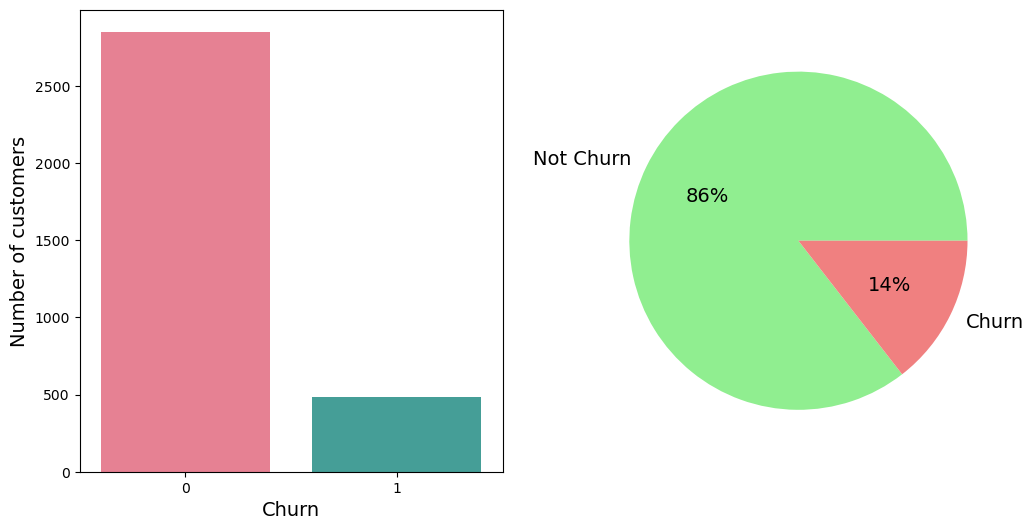

In [81]:
#0 means NOT CHURN and 1 means CHURN
# define subplots
fig, ax = plt.subplots(1,2,figsize=(12,6))

# create the pie plot for the percentage of churn and not churn customers
ax[1].pie(df.churn.value_counts(), labels=["Not Churn", "Churn"], 
          colors=["lightgreen", "lightcoral"], autopct='%.0f%%', 
          textprops={'fontsize': 14})

# create a bar plot counting the number of customers that are churn 0 and churn 1
# Updated to fix the warning by using hue instead of palette
cp = sns.countplot(data=df, x='churn', hue='churn', ax=ax[0], 
                  palette='husl', legend=False)

cp.set_xlabel("Churn", fontsize=14)
cp.set_ylabel("Number of customers", fontsize=14)

plt.show()

Plot Churn against the categorical data

C:\Users\Yashs\AppData\Local\Temp\ipykernel_21824\815943027.py:12: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.barplot(ax = a, x=temp.index, y=temp.values,hue = temp.values , palette=['lightblue','lightgreen','salmon'], legend=False)
C:\Users\Yashs\AppData\Local\Temp\ipykernel_21824\815943027.py:12: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.barplot(ax = a, x=temp.index, y=temp.values,hue = temp.values , palette=['lightblue','lightgreen','salmon'], legend=False)


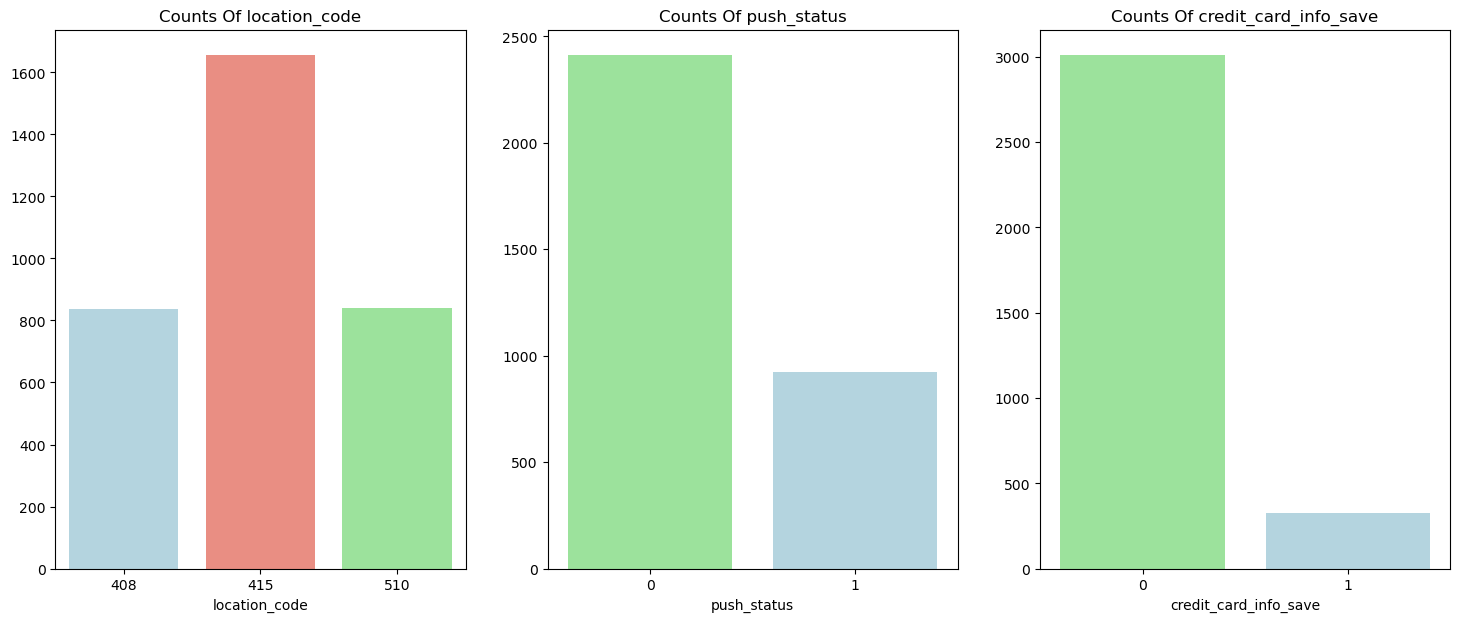

In [92]:
# Define categorical columns
categorical_columns = ["location_code","push_status","credit_card_info_save"]

# transform push status and credit card info to binary format for analysis
for i in df.select_dtypes(include = ['object']).columns.values:
    df[i] = df[i].map({'yes': 1, 'no': 0})

fig, ax = plt.subplots(1, len(categorical_columns), figsize = (18, 7))
for i, a in zip(categorical_columns, ax):
    temp = df[i].value_counts()
    a.set_title("Counts Of " + str(i))
    sns.barplot(ax = a, x=temp.index, y=temp.values,hue = temp.values , palette=['lightblue','lightgreen','salmon'], legend=False) 
plt.show()


Observations from the categorical columns plots

1) Majority of customers are in location code 415

2) Majority of customers don't allow push notifications

3) Majority of customers don't store their credit card information on the side

Plot categorical data against the Churn

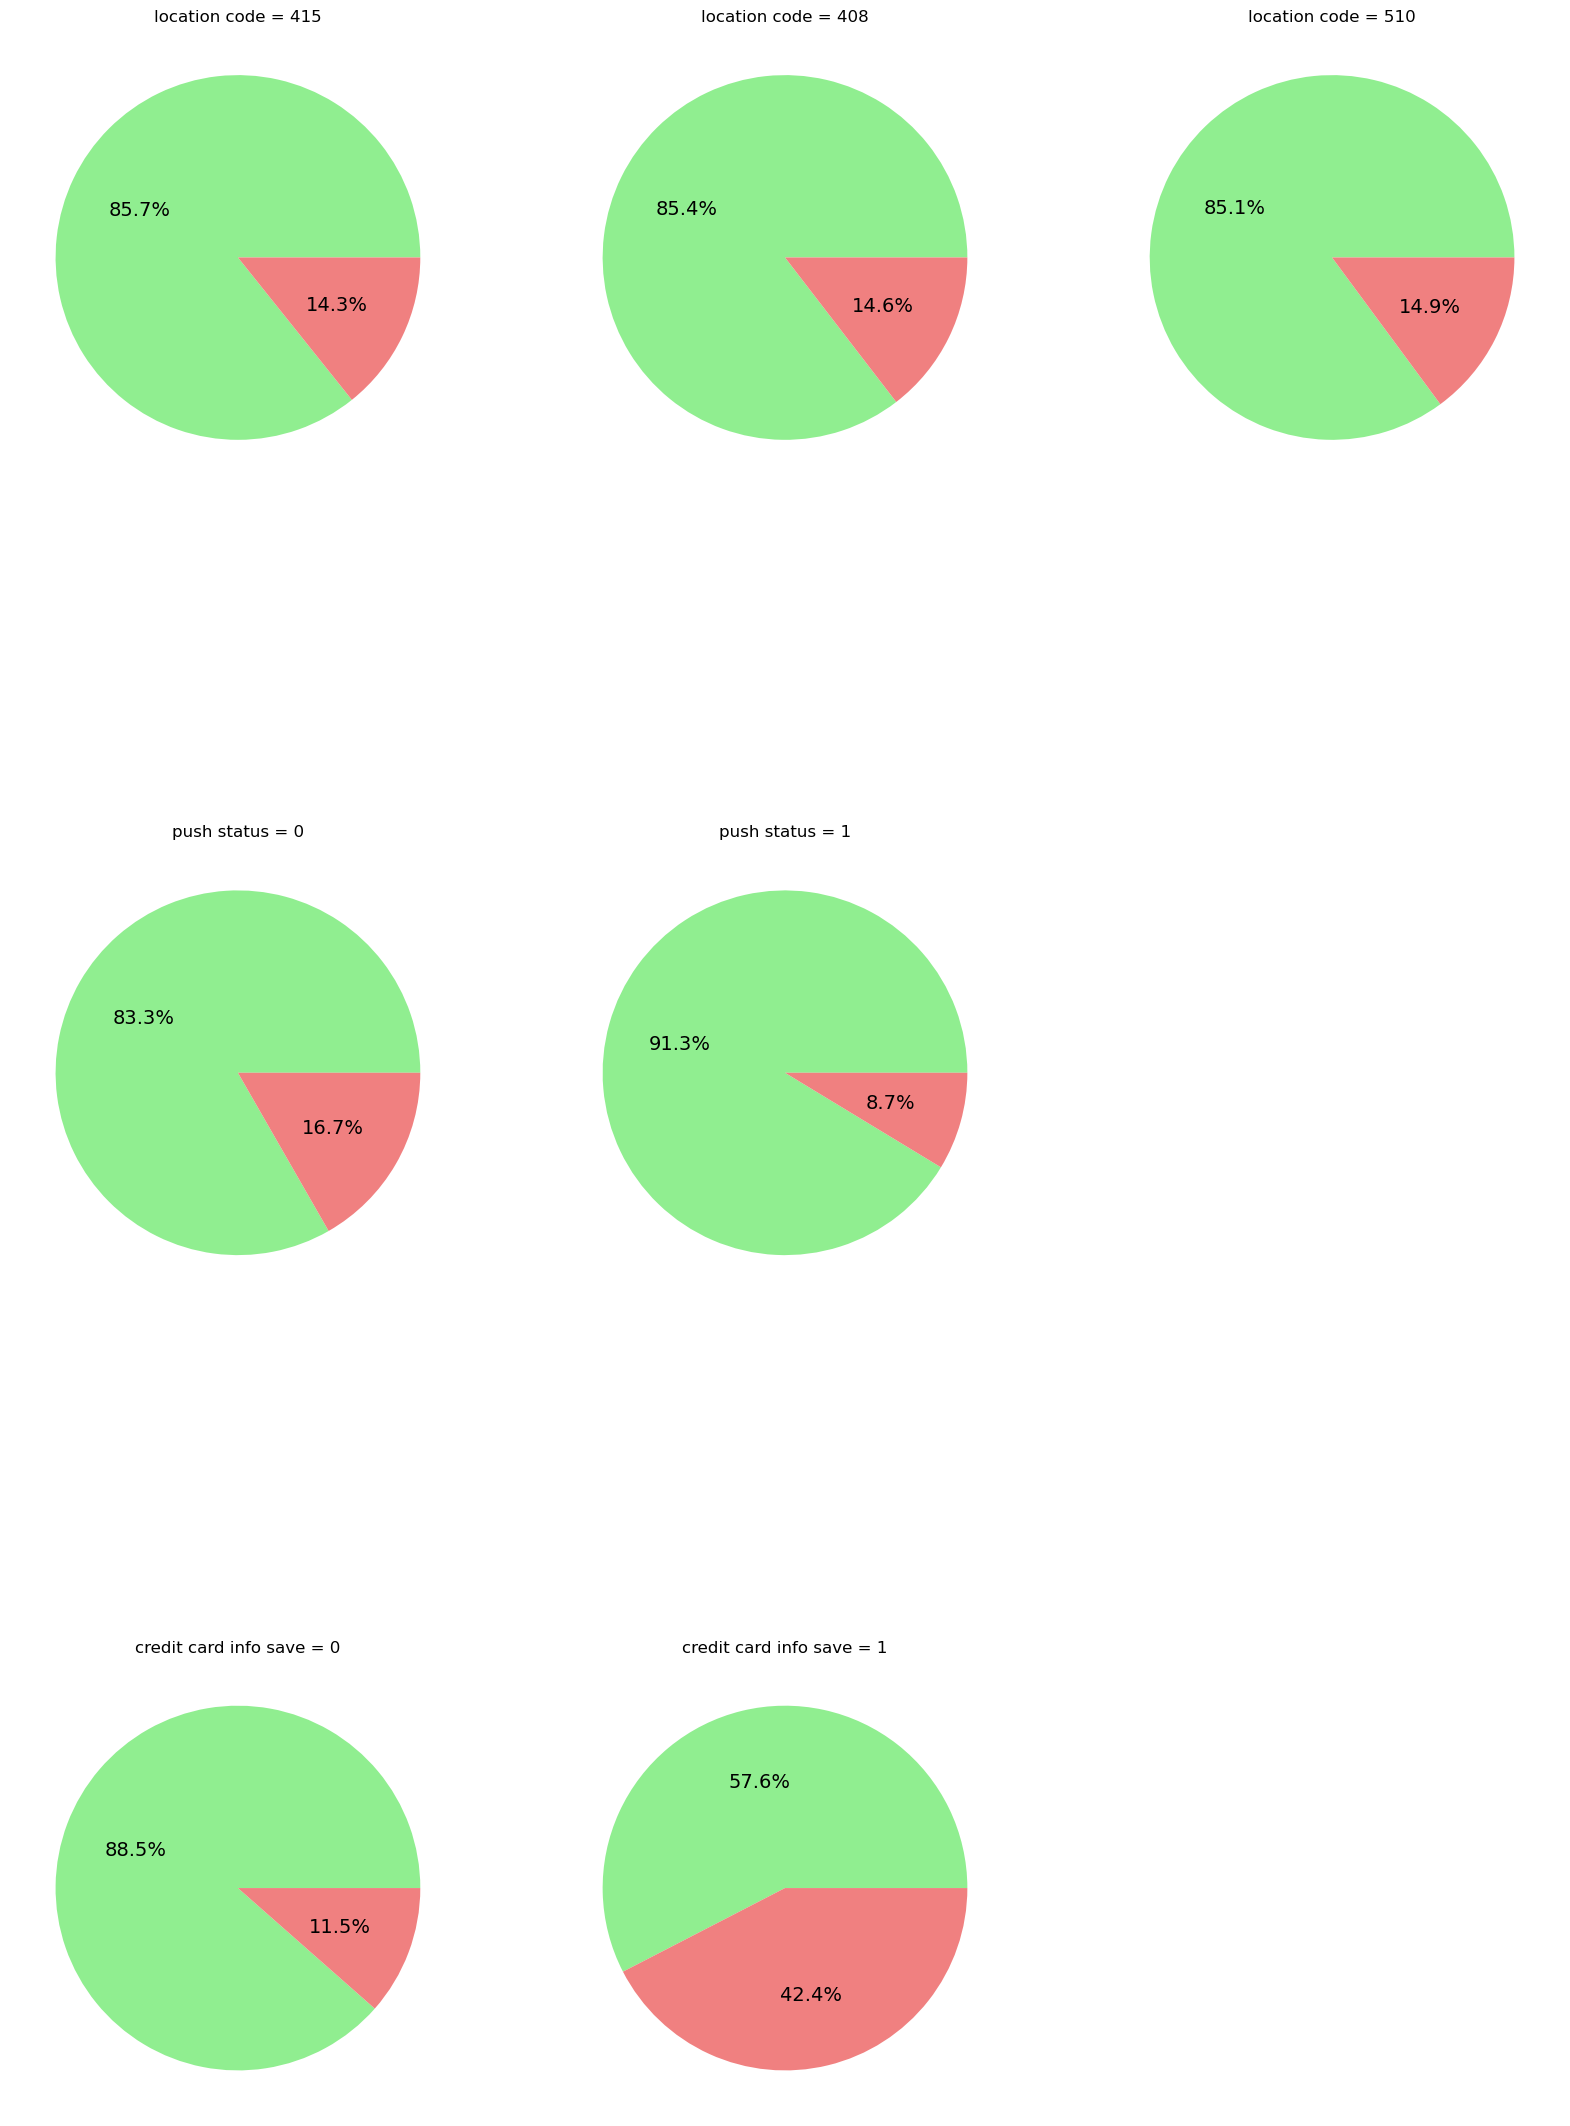

In [93]:
plt.figure(1, figsize=(20,30))
the_grid = GridSpec(3, 3)

plt.subplot(the_grid[0, 0], aspect=1, title='location code = 415')
source_pie = plt.pie(df[df[categorical_columns[0]] == df[categorical_columns[0]].unique()[0]].churn.value_counts(),colors = ["lightgreen","lightcoral"],autopct='%.1f%%',textprops={'fontsize': 14})

plt.subplot(the_grid[0, 1], aspect=1, title='location code = 408')
source_pie = plt.pie(df[df[categorical_columns[0]] == df[categorical_columns[0]].unique()[1]].churn.value_counts(),colors = ["lightgreen","lightcoral"],autopct='%.1f%%',textprops={'fontsize': 14})

plt.subplot(the_grid[0, 2], aspect=1, title='location code = 510')
source_pie = plt.pie(df[df[categorical_columns[0]] == df[categorical_columns[0]].unique()[2]].churn.value_counts(),colors = ["lightgreen","lightcoral"],autopct='%.1f%%',textprops={'fontsize': 14})

plt.subplot(the_grid[1, 0], aspect=1, title='push status = 0')
source_pie = plt.pie(df[df[categorical_columns[1]] == 0].churn.value_counts(),colors = ["lightgreen","lightcoral"],autopct='%.1f%%',textprops={'fontsize': 14})

plt.subplot(the_grid[1, 1], aspect=1, title='push status = 1')
source_pie = plt.pie(df[df[categorical_columns[1]] == 1].churn.value_counts(),colors = ["lightgreen","lightcoral"],autopct='%.1f%%',textprops={'fontsize': 14})

plt.subplot(the_grid[2, 0], aspect=1, title='credit card info save = 0')
source_pie = plt.pie(df[df[categorical_columns[2]] == 0].churn.value_counts(),colors = ["lightgreen","lightcoral"],autopct='%.1f%%',textprops={'fontsize': 14})

plt.subplot(the_grid[2, 1], aspect=1, title='credit card info save = 1')
source_pie = plt.pie(df[df[categorical_columns[2]] == 1].churn.value_counts(),colors = ["lightgreen","lightcoral"],autopct='%.1f%%',textprops={'fontsize': 14})

plt.show()

Observations from plotting categorical data against Churn

1) The location codes have a similar percentage of churns, meaning that location might not be a strong indication for churn

2) Customers with push status activated are less likely to be churns, meaning that motivating customers to activate push status might help minimize churns
3) Customers with their credit card information saved on the side are far less likely to be churns than customers without their credit card info saved. This means that if the shop motivates people to save their credit card info might minimize churns.

    This makes sense since customers who trust their credit card info on a side indicate that they trust the brand. More trust less chances of customers leaving your business.